<a href="https://colab.research.google.com/github/Davis-Dhaleema/Luminar_projects/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **KNN Algorithm**

classification using  nearest neighbours

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
x1 = [7,7,3,2]
x2 = [7,4,4,4]
target = ["bad","bad","good","good"]
features = zip(x1,x2)
features = list(features)
print(features)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features,target)
print(knn.predict([[3,7]]))

[(7, 7), (7, 4), (3, 4), (2, 4)]
['good']


**KNN algorithm using diabetes.csv**


dataset source : https://www.kaggle.com/code/ezeyinwaprisca/diabetes-csv

In [4]:
# importing basic packages and data

import numpy as np
import pandas as pd
dataframe = pd.read_csv("/content/diabetes.csv")

In [8]:
# dividing input and output columns

x = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]
y.head(10)

,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [10]:
# creating training and test dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
759,6,190,92,0,0,35.5,0.278,66
362,5,103,108,37,0,39.2,0.305,65
436,12,140,85,33,0,37.4,0.244,41
573,2,98,60,17,120,34.7,0.198,22
158,2,88,74,19,53,29.0,0.229,22
...,...,...,...,...,...,...,...,...
79,2,112,66,22,0,25.0,0.307,24
701,6,125,78,31,0,27.6,0.565,49
376,0,98,82,15,84,25.2,0.299,22
289,5,108,72,43,75,36.1,0.263,33


In [13]:
# datapreprocessing

from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [14]:
# knn model creation

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
y_predict

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

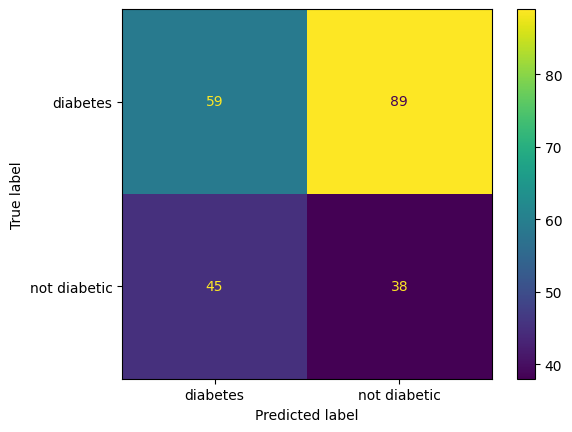

In [24]:
# to test the accuracy

from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,confusion_matrix
labels = ['diabetes',"not diabetic"]
result = confusion_matrix(y_test,y_predict) # using confusion matrix
visual = ConfusionMatrixDisplay(result,display_labels=labels)
visual.plot()

# result1 = accuracy_score(y_test,y_predict)
# result1